# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Yifan Li*
Netid:  *yl506*

## 1

### [30 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of algorithms on uniquely challenging clustering datasets. 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them your choice of 4 of the 8 interesting datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- flame.txt
- jain.txt
- pathbased.txt
- R15.txt
- spiral.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

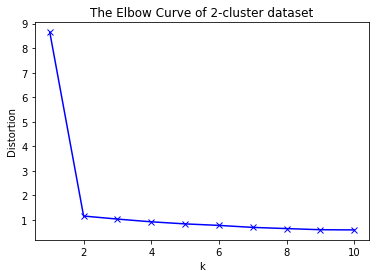

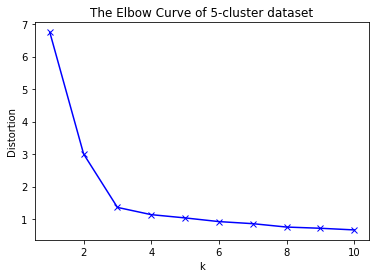

In [5]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from copy import deepcopy
from sklearn.cluster import KMeans

X, y = make_blobs(centers=2)
#X, y = make_blobs(centers=5)

# Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def kmean(k):
    # Number of clusters
    #k = 2
    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(X), size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(0, np.max(X), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    #print(C)

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables 
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    plt.show()    
    return C

distortions = []
K = range(1,11)
for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans = kmeans.fit(X)
#     labels = kmeans.predict(X)
#     distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(sum(np.min(cdist(X, kmean(k), 'euclidean'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Curve of 2-cluster dataset')
plt.show()    

X, y = make_blobs(centers=5)
distortions = []
K = range(1,11)
for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans = kmeans.fit(X)
#     labels = kmeans.predict(X)
#     distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(sum(np.min(cdist(X, kmean(k), 'euclidean'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Curve of 5-cluster dataset')
plt.show()    



**(a)** 

From the plots shown above, the elbow in the curve of 2-cluster blobs dataset is k = 2, since we can see that the marginal decrease in SSE when k changes from 2 to 3 is very small. Same reasoning applies to the elbow curve of 5-cluster blobs dataset -- The elbow in this case should be either 3 or 4 since these two k values give pretty small SSE and any further increase in k will not produce significant SSE decrease.

**(b)**

(1) K-Means clustering algorithm is a centroid-based clustering algorithm that uses distances between points as metric, and it converges very quickly and is sensitive to initialization of means. K-Means excels with clusters of equal variance but struggles when there are nonlinear boundaries between clusters and struggles in situations with variation in cluster variance and correlation between features.

(2) Agglomerative clustering algorithm is a hierarchical clustering algorithm that uses any pairwise distance as metric. It builds nested clusters by merging or splitting them successively and performs well when clusters are well-separated but struggles when intercluster distance is not sufficient to distinguish between clusters.

(3) Gaussian mixture model is a distribution-based clustering algorithm that uses mahalanobis distances to centers as metric, and assumes all the data points are generated from a mixture of a finite number of gaussian distributions with unknown parameters. Gaussian mixture models excel in situations with variation in cluster variance, correlation between features, and clusters of equal variance, but struggles when clusters are not approximately gaussian.

(4) DBSCAN is a density-based clustering algorithm that uses distances between nearest points as metric and views clusters as areas of high density separated by areas of low density. It does not require selecting of clusters beforehand.

(5) Spectral clustering uses graph distance as metric and does a low-dimension embedding of the affinity matrix between samples. It makes few assumptions about data, requires specifying number of clusters, and usually produces good clustering results especially when the affinity matrix is sparse.

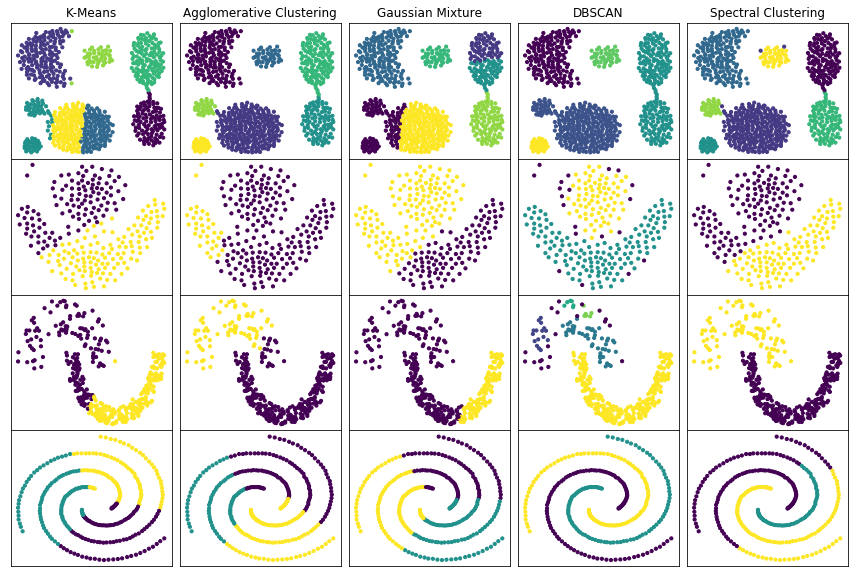

In [86]:
# (c)
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.05, hspace=0)

# Load data
file_Aggregation = './data/Aggregation.txt'
file_flame = './data/flame.txt'
file_jain = './data/jain.txt'
file_spiral = './data/spiral.txt'
X_Aggregation = np.loadtxt(file_Aggregation, usecols=[0,1])
X_flame = np.loadtxt(file_flame, usecols=[0,1])
X_jain = np.loadtxt(file_jain, usecols=[0,1])
X_spiral = np.loadtxt(file_spiral, usecols=[0,1])


# KMeans clustering
from sklearn.cluster import KMeans

kmeans_Aggregation = KMeans(n_clusters=7).fit(X_Aggregation)
y_Aggregation = kmeans_Aggregation.predict(X_Aggregation)
plt.subplot(4,5,1)
plt.scatter(X_Aggregation[:, 0], X_Aggregation[:, 1], c=y_Aggregation, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.title('K-Means')

kmeans_flame = KMeans(n_clusters=2).fit(X_flame)
y_flame = kmeans_flame.predict(X_flame)
plt.subplot(4,5,6)
plt.scatter(X_flame[:, 0], X_flame[:, 1], c=y_flame, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])

kmeans_jain = KMeans(n_clusters=2).fit(X_jain)
y_jain = kmeans_jain.predict(X_jain)
plt.subplot(4,5,11)
plt.scatter(X_jain[:, 0], X_jain[:, 1], c=y_jain, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])

kmeans_spiral = KMeans(n_clusters=3).fit(X_spiral)
y_spiral = kmeans_spiral.predict(X_spiral)
plt.subplot(4,5,16)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])

#  Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agglo_Aggregation = AgglomerativeClustering(linkage="average", n_clusters=7)
agglo_Aggregation.fit(X_Aggregation)
plt.subplot(4,5,2)
plt.scatter(X_Aggregation[:, 0], X_Aggregation[:, 1], c=agglo_Aggregation.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])
plt.title('Agglomerative Clustering')

agglo_flame = AgglomerativeClustering(linkage="complete", n_clusters=2)
agglo_flame.fit(X_flame)
plt.subplot(4,5,7)
plt.scatter(X_flame[:, 0], X_flame[:, 1], c=agglo_flame.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

agglo_jain = AgglomerativeClustering(linkage="complete", n_clusters=2)
agglo_jain.fit(X_jain)
plt.subplot(4,5,12)
plt.scatter(X_jain[:, 0], X_jain[:, 1], c=agglo_jain.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

agglo_spiral = AgglomerativeClustering(linkage="complete", n_clusters=3)
agglo_spiral.fit(X_spiral)
plt.subplot(4,5,17)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=agglo_spiral.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

# Gaussian mixture model
from sklearn.mixture import GaussianMixture

GMM_Aggregation = GaussianMixture(n_components=7, covariance_type='full').fit(X_Aggregation)
y_Aggregation = GMM_Aggregation.predict(X_Aggregation)
plt.subplot(4,5,3)
plt.scatter(X_Aggregation[:, 0], X_Aggregation[:, 1], c=y_Aggregation, s=10, cmap='viridis')
plt.yticks([])
plt.xticks([])
plt.title('Gaussian Mixture')

GMM_flame = GaussianMixture(n_components=2, covariance_type='full').fit(X_flame)
y_flame = GMM_flame.predict(X_flame)
plt.subplot(4,5,8)
plt.scatter(X_flame[:, 0], X_flame[:, 1], c=y_flame, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])

GMM_jain = GaussianMixture(n_components=2, covariance_type='full').fit(X_jain)
y_jain = GMM_jain.predict(X_jain)
plt.subplot(4,5,13)
plt.scatter(X_jain[:, 0], X_jain[:, 1], c=y_jain, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])

GMM_spiral = GaussianMixture(n_components=3, covariance_type='full').fit(X_spiral)
y_spiral = GMM_spiral.predict(X_spiral)
plt.subplot(4,5,18)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])

# DBSCAN
from sklearn.cluster import DBSCAN

DBSCAN_Aggregation = DBSCAN(eps=2).fit(X_Aggregation)
plt.subplot(4,5,4)
plt.scatter(X_Aggregation[:, 0], X_Aggregation[:, 1], c=DBSCAN_Aggregation.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])
plt.title('DBSCAN')

DBSCAN_flame = DBSCAN(eps=0.9).fit(X_flame)
plt.subplot(4,5,9)
plt.scatter(X_flame[:, 0], X_flame[:, 1], c=DBSCAN_flame.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

DBSCAN_jain = DBSCAN(eps=2).fit(X_jain)
plt.subplot(4,5,14)
plt.scatter(X_jain[:, 0], X_jain[:, 1], c=DBSCAN_jain.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

DBSCAN_spiral = DBSCAN(eps=2.5).fit(X_spiral)
plt.subplot(4,5,19)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=DBSCAN_spiral.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

# Spectral clustering
from sklearn.cluster import SpectralClustering

spectral_Aggregation = SpectralClustering(n_clusters=7).fit(X_Aggregation)
plt.subplot(4,5,5)
plt.scatter(X_Aggregation[:, 0], X_Aggregation[:, 1], c=spectral_Aggregation.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])
plt.title('Spectral Clustering')

spectral_flame = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit(X_flame)
plt.subplot(4,5,10)
plt.scatter(X_flame[:, 0], X_flame[:, 1], c=spectral_flame.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

spectral_jain = SpectralClustering(n_clusters=2).fit(X_jain)
plt.subplot(4,5,15)
plt.scatter(X_jain[:, 0], X_jain[:, 1], c=spectral_jain.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

spectral_spiral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors').fit(X_spiral)
plt.subplot(4,5,20)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=spectral_spiral.labels_, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])

plt.show()

**(c)**

The datasets that I chose from top to bottom are Aggregation, flame, jain and spiral. 

From the plots shown above, we can see that Agglomerative Clustering and Spectral Clustering are producing some pretty good results, while Gaussian Mixture has the worst performance. This is because agglomerative clustering performs well when clusters are well-separated, and spectral clustering performs well when the affinity matrix is sparse. Gaussian mixture assumes that all the data points are generated from a mixture of a finite number of gaussian distributions with other parameters, but this is not true for this dataset.

As for the flame dataset, all algorithms have relatively similar results that are neither good nor bad. This dataset should have 2 clusters, but the distribution of data points are not very clear to be distinguished mainly due to the fact that there are several data points in the middle of the two clusters. DBSCAN get relatively better results when compared to other models due to the fact that it successfully distinguishes between the two main clusters, but it performs poorly when outliers are encountered. All other models fail to explicitly distinguish between the clusters.

Spectral clustering performes really well on the jain dataset. This is fairly reasonable since the ring shape means that connectedness rather than compactness is of more importance. Theoretically, DBSCAN and agglomerative clustering should also have decent performance when dealing with similar ring-shape distributions. However, the upper ring of this particular dataset is not very compact relative to the lower one. This may introduce some difficulties for models to determine the exact boundaries of different clusters. Gaussian mixture and K-means  perform relatively bad in situations with variation in cluster variance.

The DBSCAN performs the best on the spiral dataset since it automatically choose the number of clusters and can find arbitrarily shaped clusters. All other models perform poorly since this particular shape is neither centroid-based nor Gaussian distribution-based. Also, the curves are intertwined to a certain extent, which makes it hard to get a sparse affinity matrix for spectral clustering.

## 2

### [15 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - a legend should be provided).

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

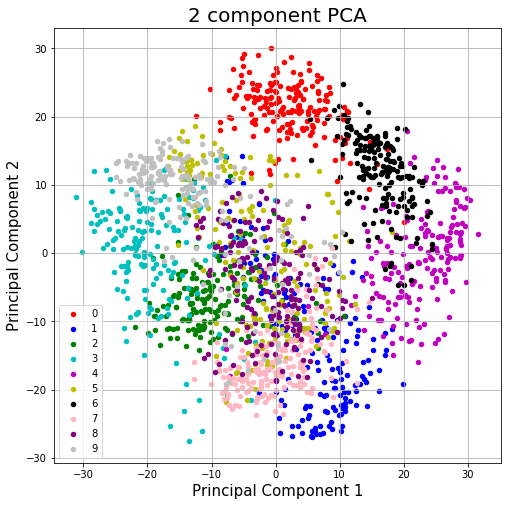

In [174]:
# (a)

from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
pca.fit(X)
X_t = pca.transform(X)

    
df = DataFrame(dict(x=X_t[:,0], y=X_t[:,1], label=y))
colors = {0:'r', 1:'b', 2:'g', 3:'c', 4:'m', 5:'y', 6:'k', 7:'lightpink', 8:'purple', 9:'silver'}
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.grid()
plt.show()

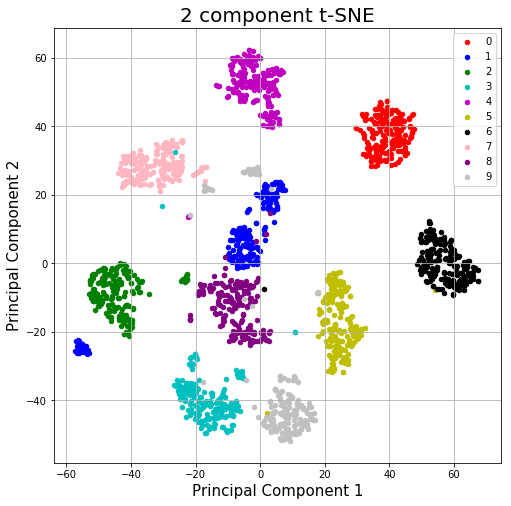

In [178]:
# (b)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
X_t_TSNE = tsne.fit_transform(X)

df = DataFrame(dict(x=X_t_TSNE[:,0], y=X_t_TSNE[:,1], label=y))
colors = {0:'r', 1:'b', 2:'g', 3:'c', 4:'m', 5:'y', 6:'k', 7:'lightpink', 8:'purple', 9:'silver'}
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 20)
ax.grid()
plt.show()

**(c)**

From the two plots shown above, we can easily see that the t-SNE produces a much better result that has clear separate clusters, while the normal linear PCA gets the result with a lot of overlapping clusters. t-SNE is particularly well-suited for embedding high-dimensional data into a space of 2 or 3 dimensions, which can then be visualized in a scatter plot. t-SNE models each high-dimensional object by a 2D or 3D point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points. So t-SNE could output a plot with clear separate clusters.

## 3

### [25 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incoporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Choose a few values of $k$ that clearly show the difference in image reconstruction. Plot the original image, and 3 compressed versions with different levels of compression (i.e. using different numbers of principal components).

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

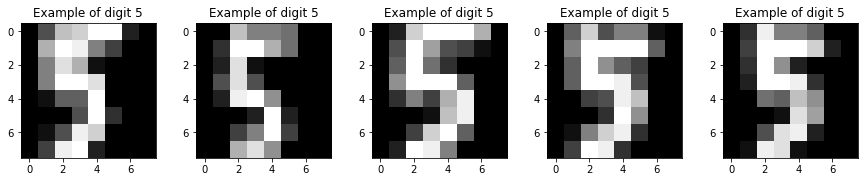

In [210]:
# (a)

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0)

digit5_indices = []
for i in range(1797):
    if y[i]==5:
        digit5_indices.append(i)
        
digit5_indices = np.array(digit5_indices)
X_digit5 = X[digit5_indices]
y_digit5 = y[digit5_indices]

for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(np.reshape(X[digit5_indices[i]], (8,8)), cmap=plt.cm.gray)
    plt.title('Example of digit 5')
plt.show()

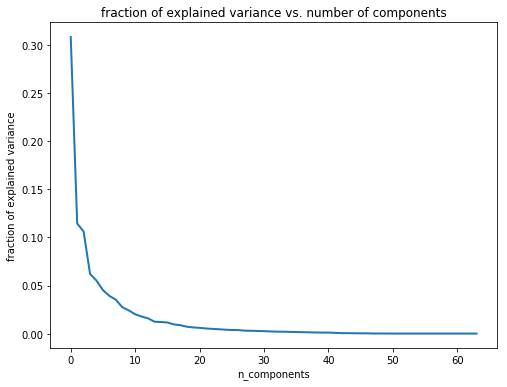

In [239]:
# (b)

pca = PCA()
pca.fit(X_digit5)

plt.figure(1, figsize=(8, 6))
plt.clf()

plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('fraction of explained variance')
plt.title('fraction of explained variance vs. number of components')
plt.show()

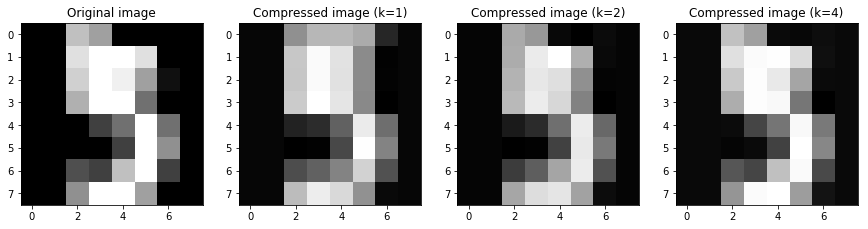

Compression Ratio (k=1) is 12.5 %
Variance retained 31.8192697635 %
Compression Ratio (k=2) is 25.0 %
Variance retained 51.9458183379 %
Compression Ratio (k=4) is 50.0 %
Variance retained 75.0795264524 %


In [311]:
# (c) 
plt.figure(figsize=(15,10))

plt.subplot(1,4,1)
#imageChosen = X[digit5_indices[0]]
imageChosen = digits.images[5]
plt.imshow(imageChosen)
plt.title('Original image')
#plt.imshow(np.reshape(imageChosen,(8,8)), cmap=plt.cm.gray)

pca_1 = PCA(n_components=1)
pca_1.fit(imageChosen)
imageChosen_pca_1 = pca_1.fit_transform(imageChosen)
#print(X_pca_4.shape)
#plt.imshow(np.reshape(pca_4.components_[0,:], (8,8)), cmap=plt.cm.gray)
imageChosen_restored = pca_1.inverse_transform(imageChosen_pca_1)
plt.subplot(1,4,2)
plt.imshow(imageChosen_restored)
plt.title('Compressed image (k=1)')


pca_2 = PCA(n_components=2)
pca_2.fit(imageChosen)
imageChosen_pca_2 = pca_2.fit_transform(imageChosen)
imageChosen_restored = pca_2.inverse_transform(imageChosen_pca_2)
plt.subplot(1,4,3)
plt.imshow(imageChosen_restored)
plt.title('Compressed image (k=2)')


pca_4 = PCA(n_components=4)
pca_4.fit(imageChosen)
imageChosen_pca_4 = pca_4.fit_transform(imageChosen)
imageChosen_restored = pca_4.inverse_transform(imageChosen_pca_4)
plt.subplot(1,4,4)
plt.imshow(imageChosen_restored)
plt.title('Compressed image (k=4)')


plt.show()

print('Compression Ratio (k=1) is %s %%' %(float(size(imageChosen_pca_1)) / size(imageChosen) * 100))
print('Variance retained %s %%' %((1 - sum(pca_1.explained_variance_ratio_) / size(pca_1.explained_variance_ratio_)) * 100))
print('Compression Ratio (k=2) is %s %%' %(float(size(imageChosen_pca_2)) / size(imageChosen) * 100))
print('Variance retained %s %%' %((1 - sum(pca_2.explained_variance_ratio_) / size(pca_2.explained_variance_ratio_)) * 100))
print('Compression Ratio (k=4) is %s %%' %(float(size(imageChosen_pca_4)) / size(imageChosen) * 100))
print('Variance retained %s %%' %((1 - sum(pca_4.explained_variance_ratio_) / size(pca_4.explained_variance_ratio_)) * 100))

**(d)**

From the plots that I got, the number of principal components required to well-approximate the original image is around 4. The compression ratio achieved is calculated and shown above, and as we can see, we can compress the image using PCA without a significant loss of its variance. As k increases, the image becomes more and more similar to the original image and is easier to distinguish since the contrast ratio increases.

## 4

### [15 points] Build and test your own Neural Network

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Your network should have two input nodes, two hidden layers with five nodes each and one output node. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC.

**(c)** Suggest at least two ways in which you neural network could be improved.

**(d)** [5 extra credit bonus points] Adjust the parameters in your model in (b) and choose your parameters to improve performance.

**ANSWER**

In [325]:
# (a)
from sklearn.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt


class NNClassifier:

    def __init__(self, n_classes, n_features, n_hidden_units=30,
                 l1=0.0, l2=0.0, epochs=500, learning_rate=0.01,
                 n_batches=1, random_seed=None):

        if random_seed:
            np.random.seed(random_seed)
        self.n_classes = n_classes
        self.n_features = n_features
        self.n_hidden_units = n_hidden_units
        self.w1, self.w2 = self._init_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.n_batches = n_batches

    def _init_weights(self):
        w1 = np.random.uniform(-1.0, 1.0, 
                               size=self.n_hidden_units * (self.n_features + 1))
        w1 = w1.reshape(self.n_hidden_units, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, 
                               size=self.n_classes * (self.n_hidden_units + 1))
        w2 = w2.reshape(self.n_classes, self.n_hidden_units + 1)
        return w1, w2

    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        return X_new

    def _forward(self, X):
        net_input = self._add_bias_unit(X, how='column')
        net_hidden = self.w1.dot(net_input.T)
        act_hidden = sigmoid(net_hidden)
        act_hidden = self._add_bias_unit(act_hidden, how='row')
        net_out = self.w2.dot(act_hidden)
        act_out = sigmoid(net_out)
        return net_input, net_hidden, act_hidden, net_out, act_out
    
    def _backward(self, net_input, net_hidden, act_hidden, act_out, y):
        sigma3 = act_out - y
        net_hidden = self._add_bias_unit(net_hidden, how='row')
        sigma2 = self.w2.T.dot(sigma3) * sigmoid_prime(net_hidden)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(net_input)
        grad2 = sigma3.dot(act_hidden.T)
        return grad1, grad2

    def _error(self, y, output):
        L1_term = L1_reg(self.l1, self.w1, self.w2)
        L2_term = L2_reg(self.l2, self.w1, self.w2)
        error = cross_entropy(output, y) + L1_term + L2_term
        return 0.5 * np.mean(error)

    def _backprop_step(self, X, y):
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(X)
        y = y.T

        grad1, grad2 = self._backward(net_input, net_hidden, act_hidden, act_out, y)

        # regularize
        grad1[:, 1:] += (self.w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (self.w2[:, 1:] * (self.l1 + self.l2))

        error = self._error(y, act_out)
        
        return error, grad1, grad2

    def predict(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return mle(net_out.T)
    
    def predict_proba(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return softmax(act_out.T)

    def fit(self, X, y):
        self.error_ = []
        X_data, y_data = X.copy(), y.copy()
        y_data_enc = OneHotEncoder(y_data, self.n_classes)
        for i in range(self.epochs):

            X_mb = np.array_split(X_data, self.n_batches)
            y_mb = np.array_split(y_data_enc, self.n_batches)
            
            epoch_errors = []

            for Xi, yi in zip(X_mb, y_mb):
                
                # update weights
                error, grad1, grad2 = self._backprop_step(Xi, yi)
                epoch_errors.append(error)
                self.w1 -= (self.learning_rate * grad1)
                self.w2 -= (self.learning_rate * grad2)
            self.error_.append(np.mean(epoch_errors))
        return self
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.sum(y == y_hat, axis=0) / float(X.shape[0])
    
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


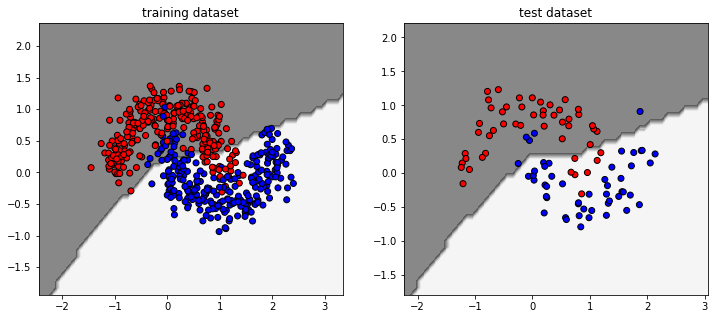

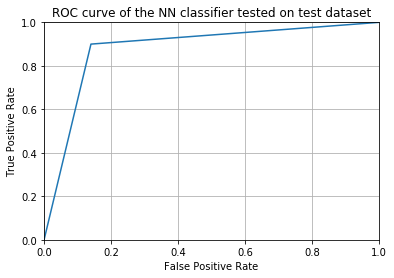

In [341]:
# (b)

from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12,5))
X_train, y_train = make_moons(n_samples=500, noise=0.20)
X_test, y_test = make_moons(n_samples=100, noise=0.20)

clf = NNClassifier(n_classes=2, n_features=2, n_hidden_units=2, l2=0.5, l1=0.0, 
                  epochs=100, learning_rate=0.001, n_batches=20)
clf.fit(X_train, y_train)



x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1,2,1)
ax.contourf(xx, yy, Z, alpha=0.5)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolor='k')
plt.title('training dataset')


x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax = plt.subplot(1,2,2)
ax.contourf(xx, yy, Z, alpha=0.5)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolor='k')
plt.title('test dataset')

plt.show()


from sklearn import metrics
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve of the NN classifier tested on test dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

**(c)**

Some possible ways of improving the performance of the neural network: Increasing the number of hidden layers, Changing the activation function in network and in output layer, increasing the number of neurons, and better weight initialization.